In [2]:
# The data describe the change in flux (light intensity) of several 
# thousand stars. Each star has a binary label of 2 or 1. 2 indicated 
# that the star is confirmed to have at least one exoplanet in orbit; 
# some observations are in fact multi-planet systems.

# As you can imagine, planets themselves do not emit light, but the stars 
# that they orbit do. If said star is watched over several months or years,
# there may be a regular 'dimming' of the flux (the light intensity). 
# This is evidence that there may be an orbiting body around the star; 
# such a star could be considered to be a 'candidate' system. 
# Further study of our candidate system, for example by a satellite that 
# captures light at a different wavelength, could solidify the belief that
# the candidate can in fact be 'confirmed'.

# What are light intensity of each star? Regression 
# What is the pick point and the low points of energy?
# Is there any orboting body around which star? 

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import seaborn as sns
import itertools

In [4]:
exoplanet = pd.read_csv('datasets/exoTest.csv')
exoplanet

#LABEL -> 2 is an exoplanet star and 1 is a non-exoplanet-star.
#FLUX1-FLUX3197 -> the light intensity recorded for each star, at a different point in time.

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53
6,1,-150.48,-141.72,-157.60,-184.60,-164.89,-173.87,-162.91,-167.04,-172.76,...,7.15,5.16,-9.08,-39.11,-32.31,-8.40,-16.80,-8.03,-12.73,-11.41
7,1,-10.06,-12.78,-13.16,-9.81,-18.91,-20.33,-22.85,-19.17,-17.97,...,21.49,30.63,24.19,33.00,35.70,35.89,-33.44,-30.83,-33.00,-20.15
8,1,454.66,440.60,382.29,361.63,298.63,253.29,155.86,110.38,31.71,...,-56.78,-61.64,-120.32,-65.39,-126.75,-78.18,-184.39,-142.31,-113.12,-111.78
9,1,187.40,209.60,199.91,179.62,171.21,161.84,163.02,171.61,113.53,...,-23.75,-35.72,-21.93,-16.47,-21.84,-26.64,-13.90,17.03,4.36,2.91


In [5]:
exoplanet.isnull().sum

<bound method DataFrame.sum of      LABEL  FLUX.1  FLUX.2  FLUX.3  FLUX.4  FLUX.5  FLUX.6  FLUX.7  FLUX.8  \
0    False   False   False   False   False   False   False   False   False   
1    False   False   False   False   False   False   False   False   False   
2    False   False   False   False   False   False   False   False   False   
3    False   False   False   False   False   False   False   False   False   
4    False   False   False   False   False   False   False   False   False   
5    False   False   False   False   False   False   False   False   False   
6    False   False   False   False   False   False   False   False   False   
7    False   False   False   False   False   False   False   False   False   
8    False   False   False   False   False   False   False   False   False   
9    False   False   False   False   False   False   False   False   False   
10   False   False   False   False   False   False   False   False   False   
11   False   False   False   Fals

In [6]:
#Normalising X
X = np.linspace(5, 100, 20).reshape(4, 5)
print(X)

[[  5.  10.  15.  20.  25.]
 [ 30.  35.  40.  45.  50.]
 [ 55.  60.  65.  70.  75.]
 [ 80.  85.  90.  95. 100.]]


In [7]:
def Normalise(matrix, maxPrime, minPrime):
    maximum = np.max(matrix)
    minimum = np.min(matrix)
    
    numerator = [x - minimum for x in np.nditer(matrix)]
    denominator = maximum - minimum 
    multiplier = maxPrime - minPrime
    
    XNorm = (numerator / denominator) * multiplier + minPrime
    
    return XNorm

In [8]:
XN = Normalise(X, 1, 0.05).reshape(4, 5)
print(XN)
print(XN.shape)

[[0.05 0.1  0.15 0.2  0.25]
 [0.3  0.35 0.4  0.45 0.5 ]
 [0.55 0.6  0.65 0.7  0.75]
 [0.8  0.85 0.9  0.95 1.  ]]
(4, 5)


In [9]:
exoplanet_test = pd.read_csv('datasets/exoTest.csv')
exoplanet_test

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53
6,1,-150.48,-141.72,-157.60,-184.60,-164.89,-173.87,-162.91,-167.04,-172.76,...,7.15,5.16,-9.08,-39.11,-32.31,-8.40,-16.80,-8.03,-12.73,-11.41
7,1,-10.06,-12.78,-13.16,-9.81,-18.91,-20.33,-22.85,-19.17,-17.97,...,21.49,30.63,24.19,33.00,35.70,35.89,-33.44,-30.83,-33.00,-20.15
8,1,454.66,440.60,382.29,361.63,298.63,253.29,155.86,110.38,31.71,...,-56.78,-61.64,-120.32,-65.39,-126.75,-78.18,-184.39,-142.31,-113.12,-111.78
9,1,187.40,209.60,199.91,179.62,171.21,161.84,163.02,171.61,113.53,...,-23.75,-35.72,-21.93,-16.47,-21.84,-26.64,-13.90,17.03,4.36,2.91


In [10]:
exoplanetSubset = exoplanet_test.iloc[3:6, 3:9]
exoplanetSubset = pd.DataFrame.as_matrix(exoplanetSubset)

In [11]:
exoplanetSubset

array([[-846.12, -836.03, -745.5 , -784.69, -791.22, -746.5 ],
       [  -9.16,   -6.37,  -16.13,  -24.05,   -0.9 ,  -45.2 ],
       [  14.56,   12.42,   12.07,   12.92,   12.27,    3.19]])

In [12]:
Norm = Normalise(exoplanetSubset, 1, 0)

In [13]:
Norm = Norm.reshape(3, 6)
Norm = pd.DataFrame(Norm)

In [14]:
print(Norm)

          0         1         2         3         4         5
0  0.000000  0.972440  1.000000  0.011723  0.975682  0.997514
1  0.116908  0.964342  0.997107  0.071374  0.955140  0.998095
2  0.063787  0.982037  0.997339  0.115746  0.930567  0.986790


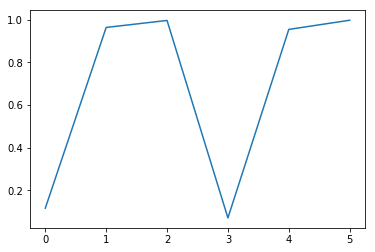

In [15]:
plt.plot(Norm.iloc[1, 0:])

In [16]:
exoplanet_subsetO = exoplanet_test.iloc[3:6, 3:9]
exoplanet_subsetO = pd.DataFrame.as_matrix(exoplanet_subsetO)
exoplanet_subsetO = pd.DataFrame(exoplanet_subsetO)
print(exoplanet_subsetO)

        0       1       2       3       4       5
0 -846.12 -836.03 -745.50 -784.69 -791.22 -746.50
1   -9.16   -6.37  -16.13  -24.05   -0.90  -45.20
2   14.56   12.42   12.07   12.92   12.27    3.19


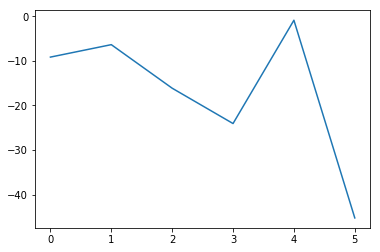

In [17]:
plt.plot(exoplanet_subsetO.iloc[1,0:])

In [18]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

In [19]:
data = np.random.randint(10,20, size=(4,6))
data = pd.DataFrame(data)
print(data)

    0   1   2   3   4   5
0  14  13  17  14  14  18
1  16  15  17  14  16  12
2  15  19  12  14  11  12
3  13  16  18  14  15  13


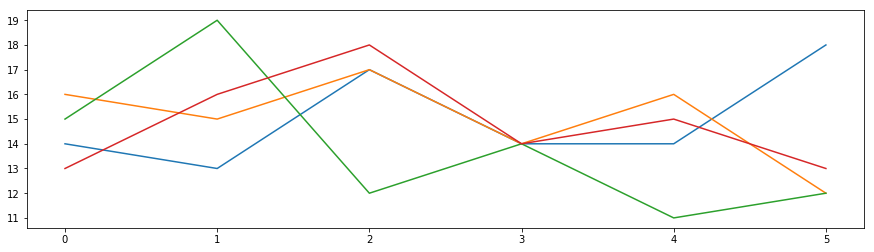

In [20]:
plt.plot(data.iloc[0,])
plt.plot(data.iloc[1,])
plt.plot(data.iloc[2,])
plt.plot(data.iloc[3,])

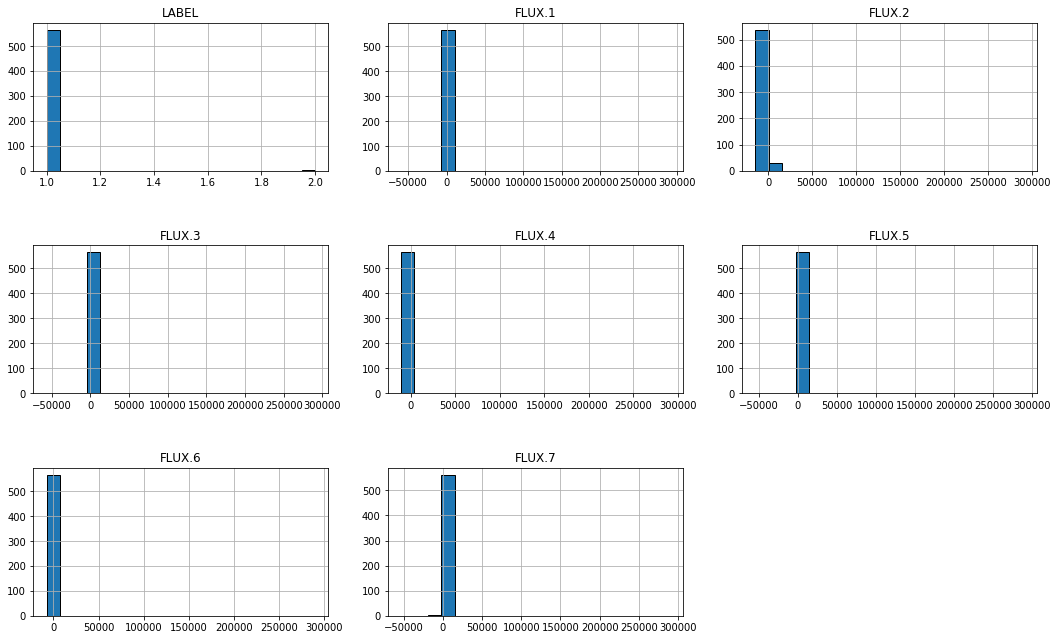

In [21]:
columns=exoplanet_test.columns[:8]
plt.subplots(figsize = (18,15))
length = (len(columns))
for i, j in itertools.zip_longest(columns, range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    exoplanet_test[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [22]:
data = pd.read_csv('datasets/exoTrain.csv')

In [23]:
data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [24]:
labels = data.LABEL
data = data.drop('LABEL', axis=1)

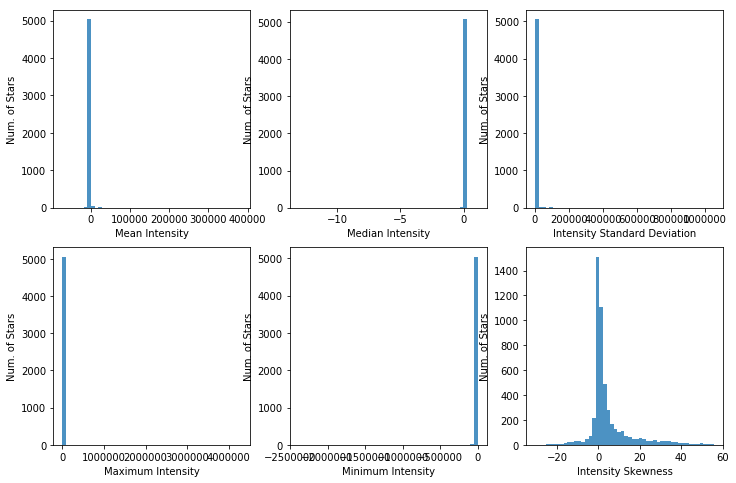

In [25]:
#Checking statistics and found some outliers
def Plot_Stars(data):
    means = data.mean(axis=1)
    medians = data.median(axis=1)
    std = data.std(axis=1)
    maxval = data.max(axis=1)
    minval = data.min(axis=1)
    skew = data.skew(axis=1)
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(231)
    ax.hist(means,alpha=0.8,bins=50)
    ax.set_xlabel('Mean Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(232)
    ax.hist(medians,alpha=0.8,bins=50)
    ax.set_xlabel('Median Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(233)
    ax.hist(std,alpha=0.8,bins=50)
    ax.set_xlabel('Intensity Standard Deviation')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(234)
    ax.hist(maxval,alpha=0.8,bins=50)
    ax.set_xlabel('Maximum Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(235)
    ax.hist(minval,alpha=0.8,bins=50)
    ax.set_xlabel('Minimum Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(236)
    ax.hist(skew,alpha=0.8,bins=50)
    ax.set_xlabel('Intensity Skewness')
    ax.set_ylabel('Num. of Stars')

Plot_Stars(data)
plt.show()

In [26]:
data[labels==1].median(axis=1).describe()

count    5050.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

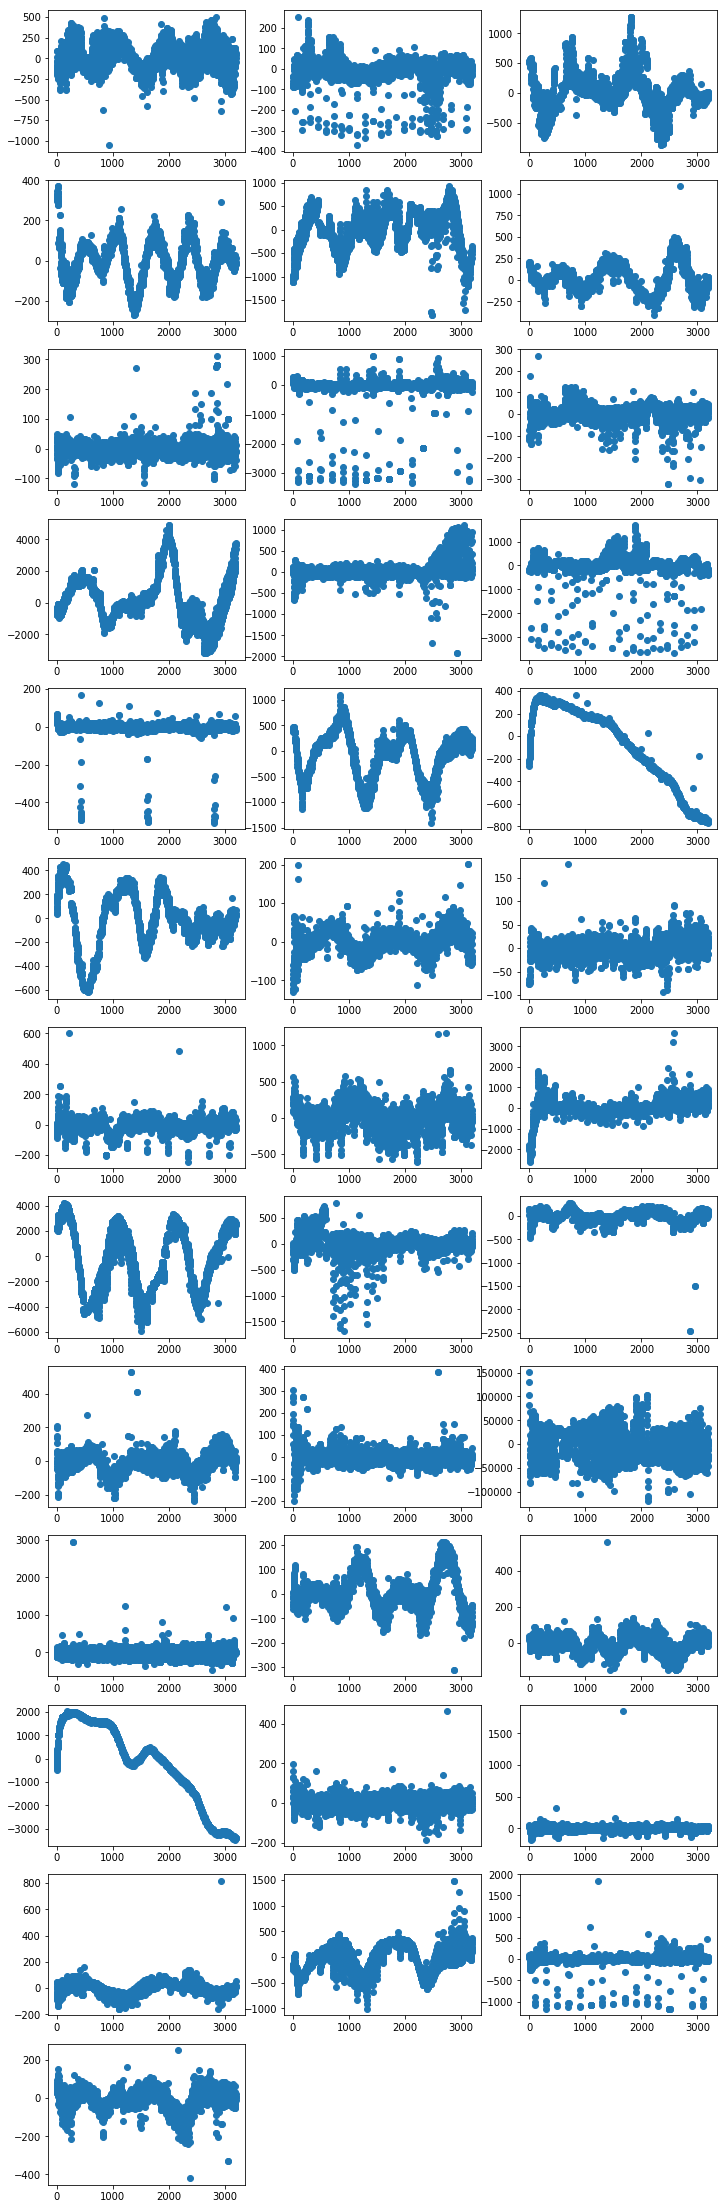

In [27]:
#Check the data for 37 exoplanet stars
fig = plt.figure(figsize=(12,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(x,data[labels==2].iloc[i,:])

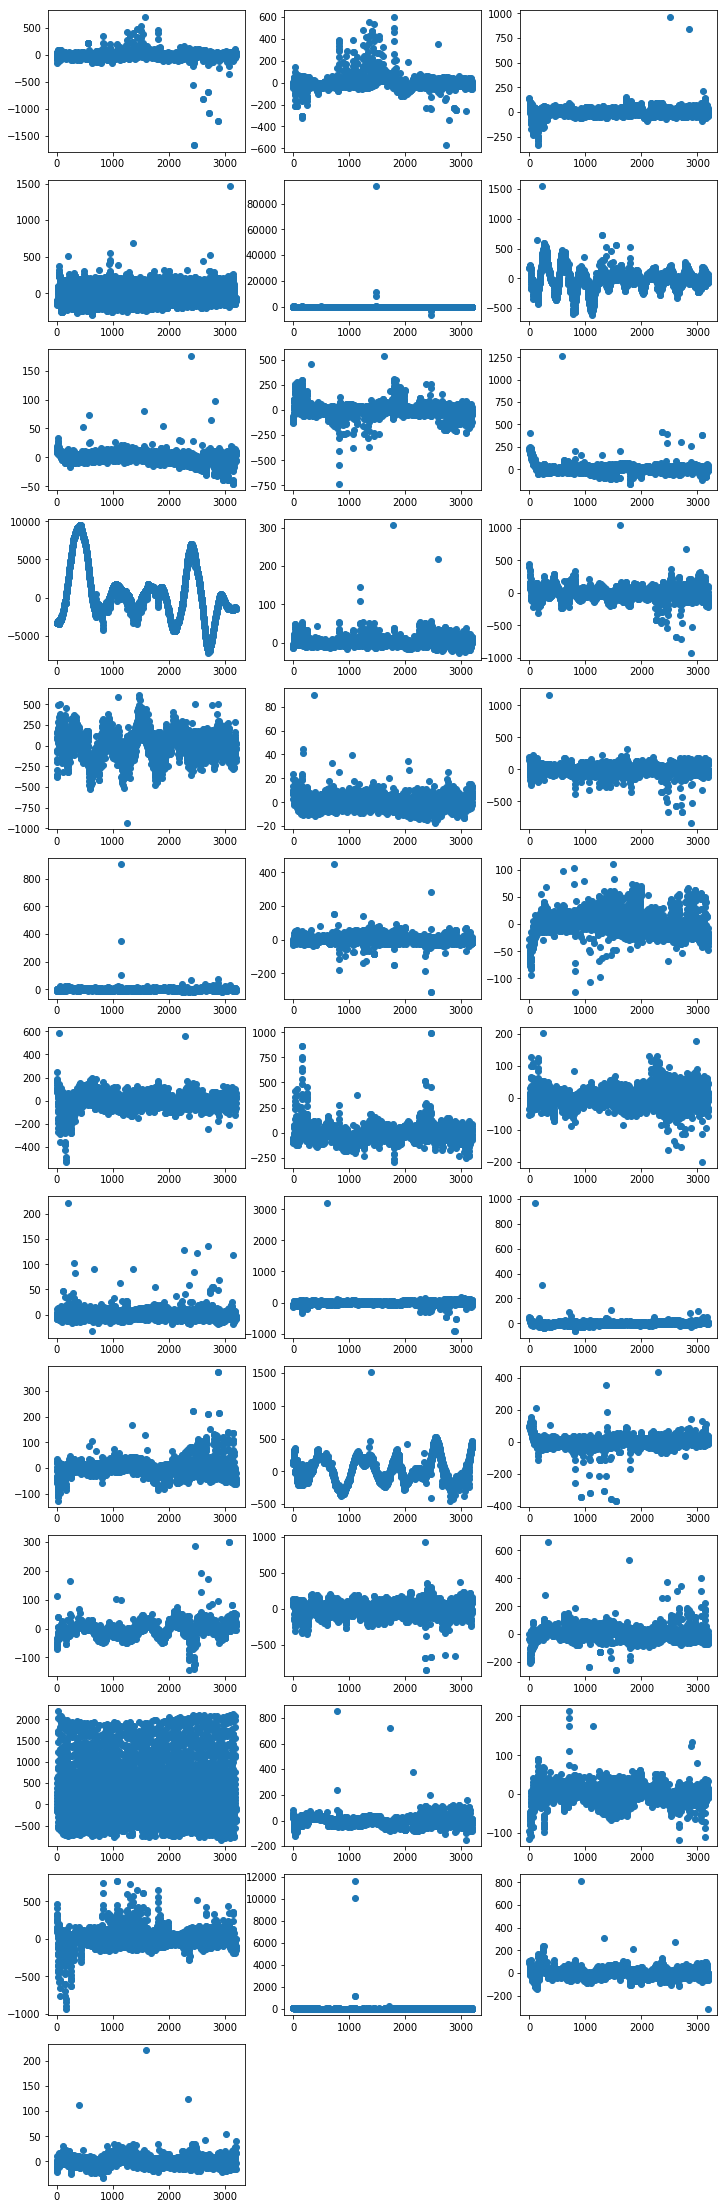

In [28]:
#Check the data for 37 non-exoplanet-star
fig = plt.figure(figsize=(12,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(x,data[labels==1].iloc[i,:])

In [29]:
import scipy.ndimage 
import xgboost as xg
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE #Handle imbalanced datasets
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline, Pipeline

In [30]:
data.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [31]:
train = pd.read_csv('./datasets/exoTrain.csv')
# 5087 rows or observations.
# 3198 columns or features.
# Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
# 37 confirmed exoplanet-stars and 5050 non-exoplanet-stars.
test = pd.read_csv('./datasets/exoTest.csv')
# 570 rows or observations.
# 3198 columns or features.
# Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
# 5 confirmed exoplanet-stars and 565 non-exoplanet-stars.

In [32]:
X_train = train.drop('LABEL', axis=1)
Y_train = train.LABEL
x_test = test.drop('LABEL', axis=1)

In [33]:
#Stars that has exoplanet 2
z = train[train.LABEL==2]
z

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


In [34]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/EMrmrRGcEbI" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')
#This animation shows a kind of stellar explosion called a Fast-Evolving 
#Luminous Transient. In this case, a giant star “burps” out a shell of gas
#and dust about a year before exploding. Most of the energy from the 
#supernova turns into light when it hits this previously ejected material,
#resulting in a short, but brilliant burst of radiation.
#Credits: NASA/JPL-Caltech

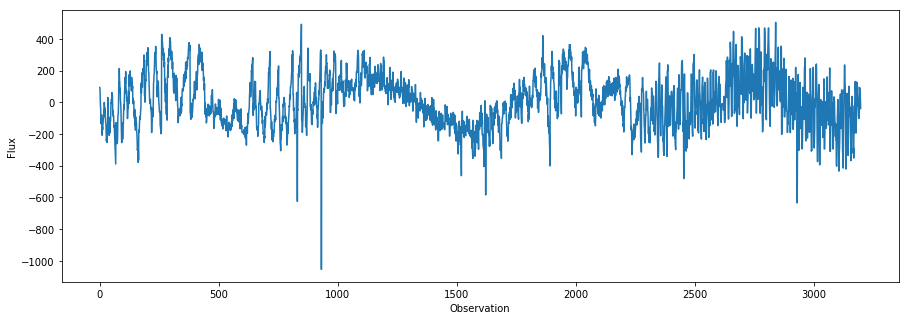

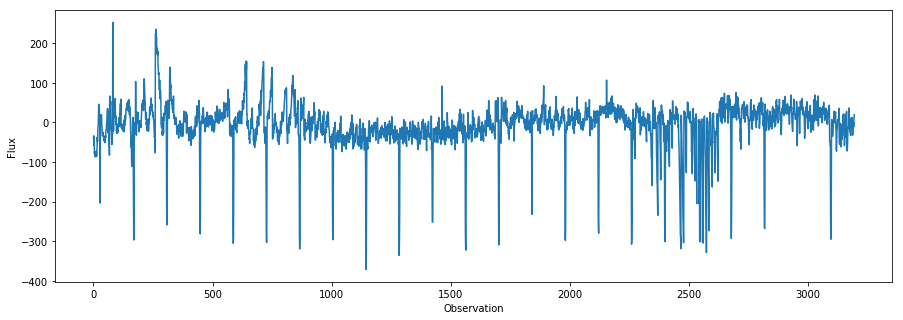

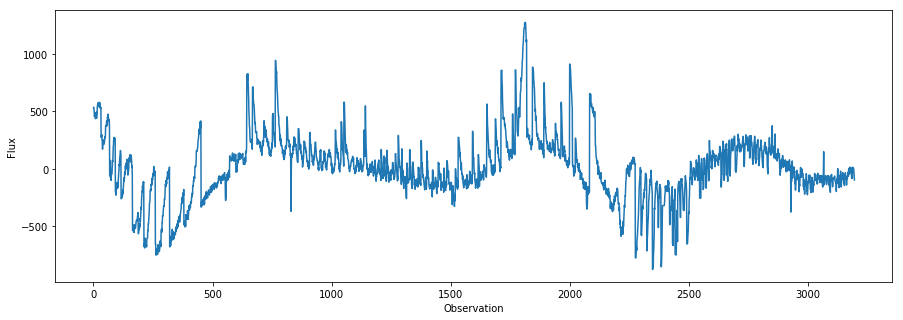

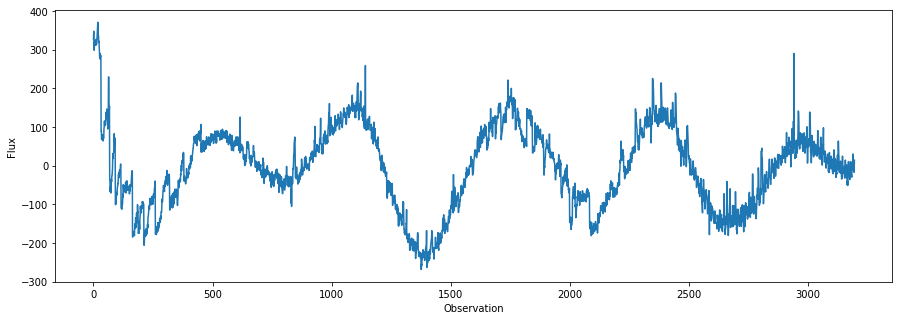

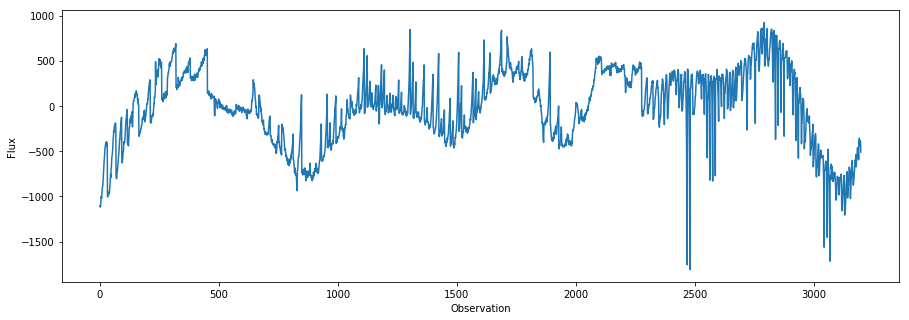

In [35]:
for i in [0,1,2,3,4]:
    Y = X_train.iloc[i]
    X = np.arange(len(Y)) 
    plt.figure(figsize=(15,5))
    plt.ylabel('Flux')
    plt.xlabel('Observation')
    plt.plot(X, Y)
    plt.show()

In [36]:
#This animation shows the explosion of a white dwarf, an extremely dense 
#remnant of a star that can no longer burn nuclear fuel at its core.
#In this “type Ia” supernova, white dwarf’s gravity steals material away 
#from a nearby stellar companion. When the white dwarf reaches an estimated
#1.4 times the current mass of the Sun, it can no longer sustain its own
#weight, and blows up.

#Credits: NASA/JPL-Caltech
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/20cxOCcOIP4" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

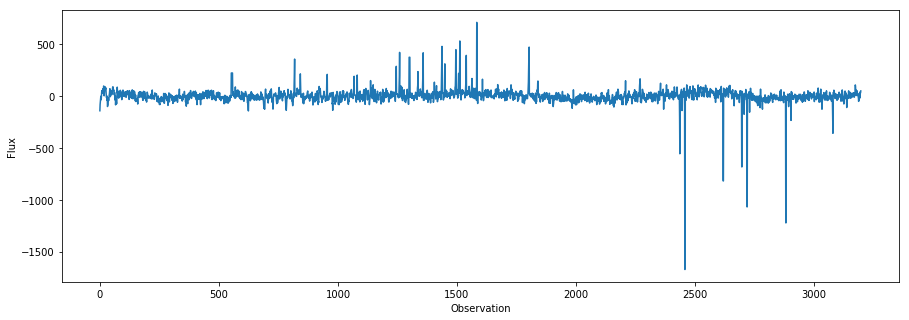

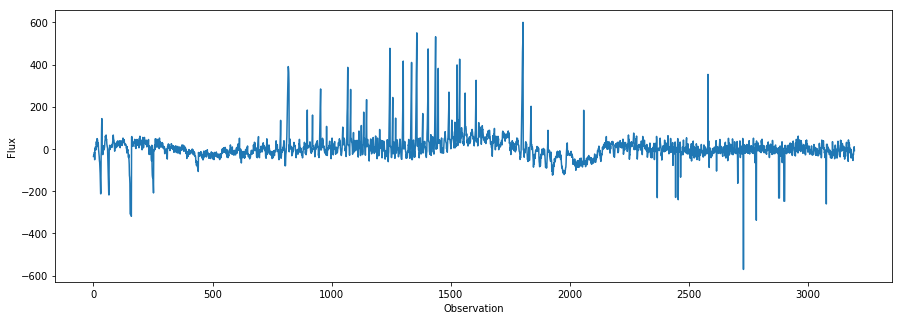

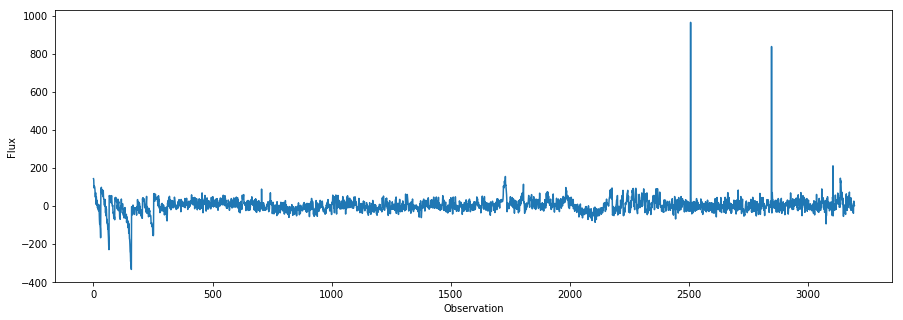

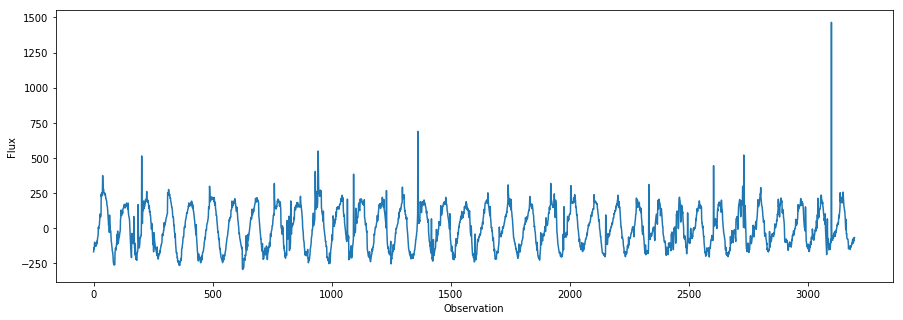

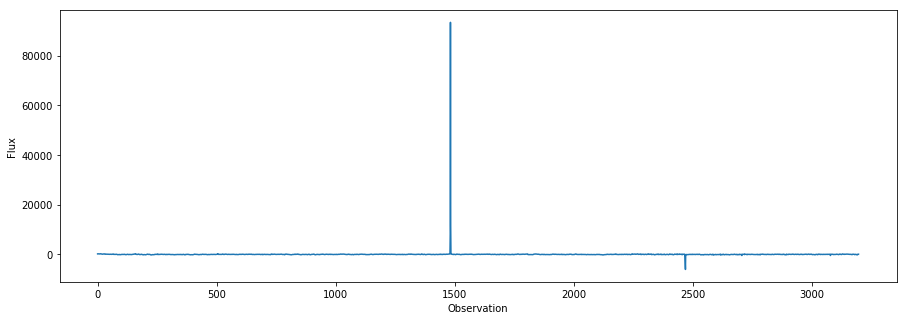

In [37]:
# 37 confirmed exoplanet-stars and 5050 non-exoplanet-stars.
for i in [j for j in range (37,42)]:    
    Y = X_train.iloc[i]
    X = np.arange(len(Y)) 
    plt.figure(figsize=(15,5))
    plt.ylabel('Flux')
    plt.xlabel('Observation')
    plt.plot(X, Y)
    plt.show()

In [38]:
#This animation shows the merger of two white dwarfs. 
#A white dwarf is an extremely dense remnant of a star that can no 
#longer burn nuclear fuel at its core. This is another way that a “type Ia”
#supernova occurs.
#Credits: NASA/JPL-Caltech
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/5EM8eUhnJ3A" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

In [39]:
#Normalizing the data
def normal(X):
    Y= (X-np.mean(X))/(np.max(X)-np.min(X))
    return Y

In [40]:
X_train= X_train.apply(normal,axis=1)

In [41]:
X_test = x_test.apply(normal, axis=1)

In [42]:
#Sampleling the signal over a period of time (or space) 
#and divides it into its frequency components.
def fast_fourier_transf(X):
    Y = scipy.fft(X, n=X.size)
    return np.abs(Y)

In [43]:
X_train = X_train.apply(fast_fourier_transf, axis=1)

In [44]:
X_test = X_test.apply(fast_fourier_transf,axis=1)

In [45]:
# This animation shows a gigantic star exploding in a “core collapse” 
# supernova. As atoms fuse inside the star, eventually the star can’t 
# support its own weight anymore. Gravity makes the star collapse on 
# itself. Core collapse supernovae are called type Ib, Ic, or II depending 
# on the chemical elements present.

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/AxSQTFOzBWw" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

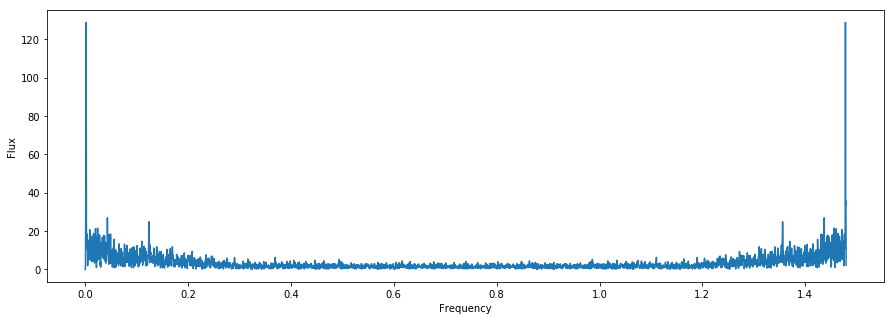

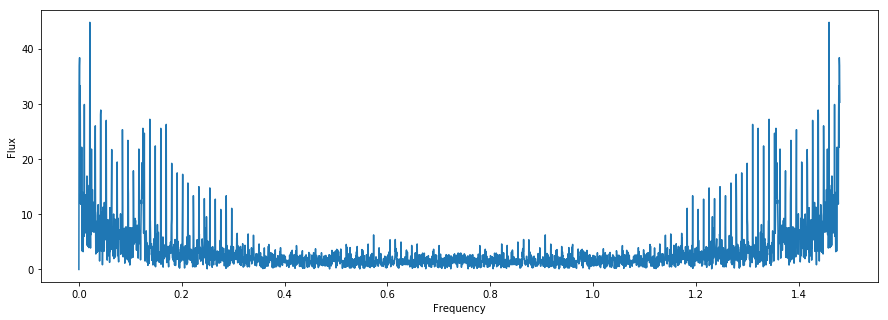

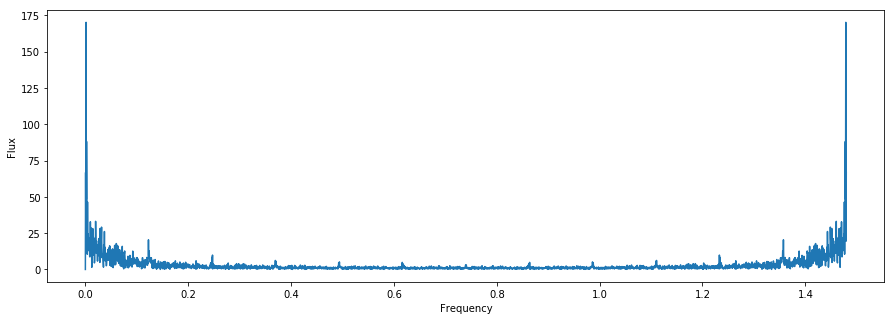

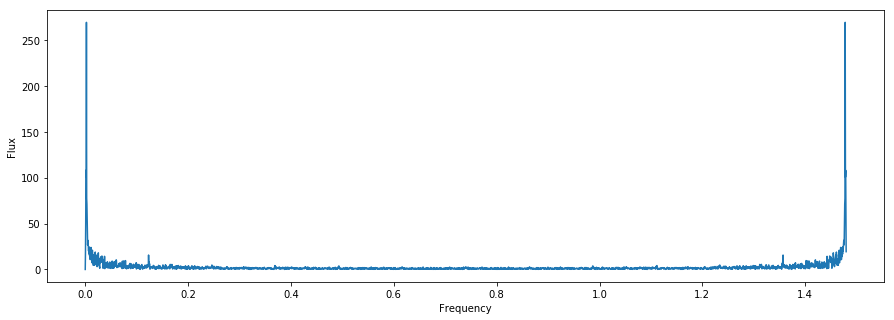

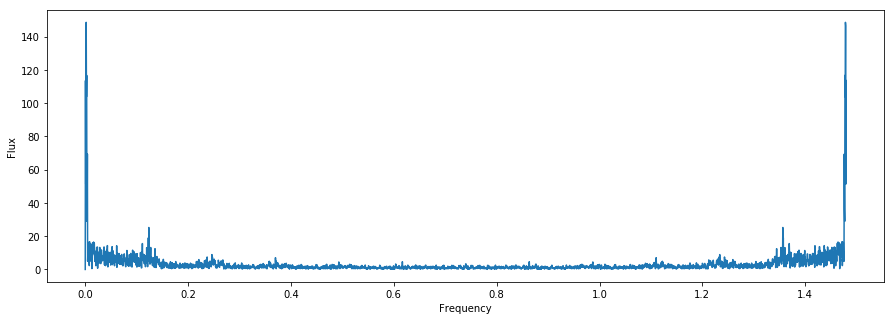

In [46]:
# Frequency of each light intensity of 5 Stars
# 5 confirmed exoplanet-stars and 565 non-exoplanet-stars.
for i in [0,1,2,3,4]:
    Y = X_train.iloc[i]
    X = np.arange(len(Y))*(1/(36.0*60.0)) 
    plt.figure(figsize=(15,5))
    plt.ylabel('Flux')
    plt.xlabel('Frequency')
    plt.plot(X, Y)
    plt.show()

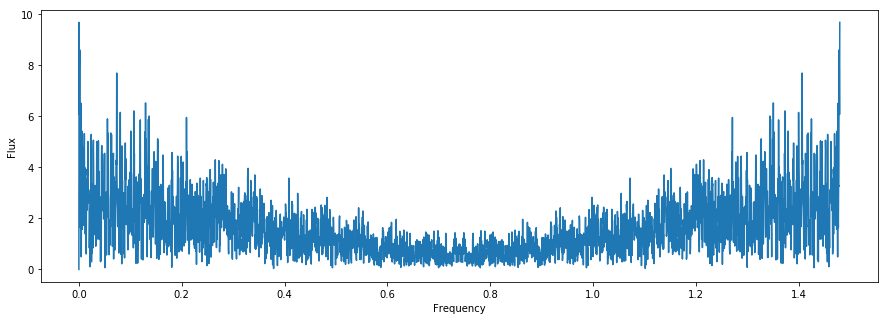

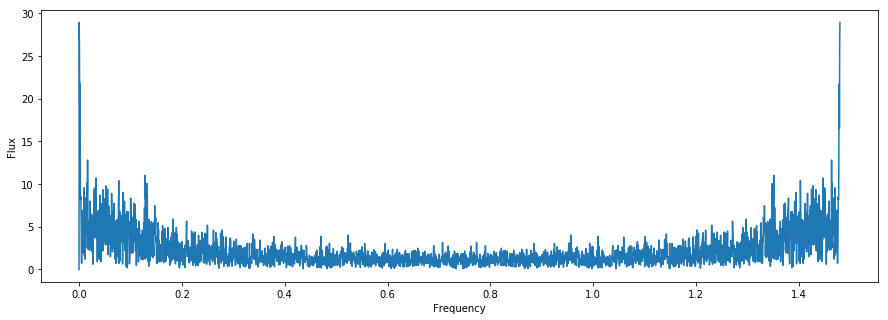

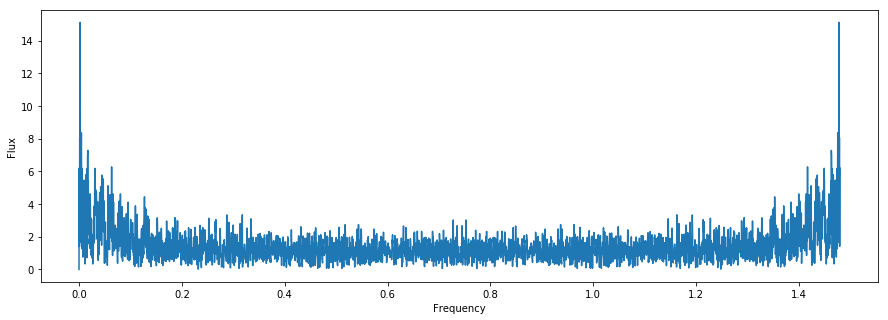

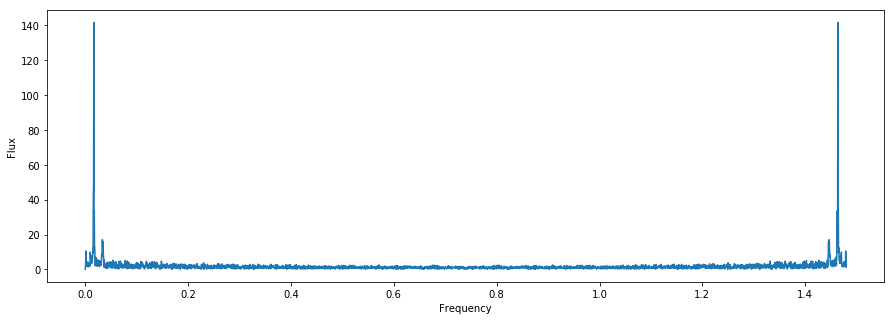

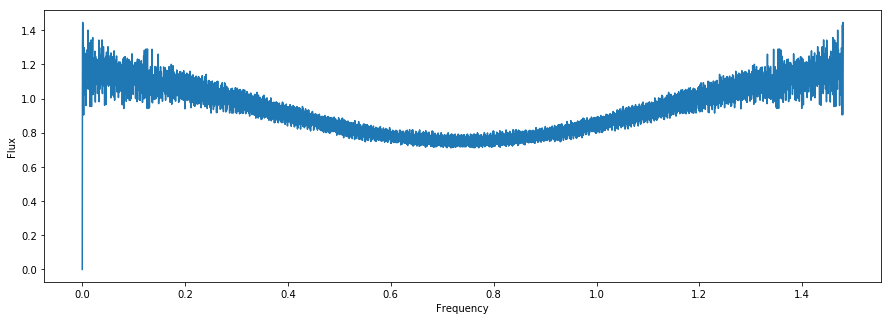

In [47]:
#Frequency of each light intensity of 5 Stars
for i in [j for j in range (37,42)]:
    Y = X_train.iloc[i]
    X = np.arange(len(Y))*(1/(36.0*60.0)) 
    plt.figure(figsize=(15,5))
    plt.ylabel('Flux')
    plt.xlabel('Frequency')
    plt.plot(X, Y)
    plt.show()

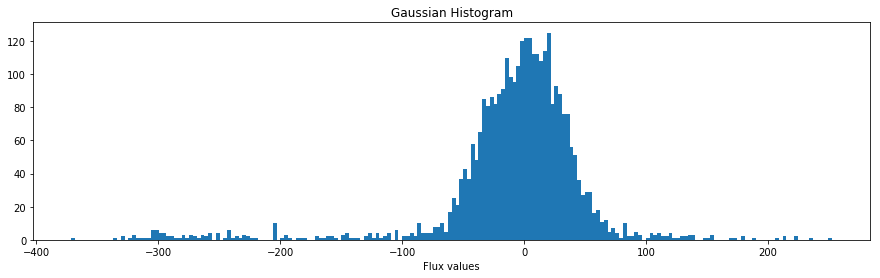

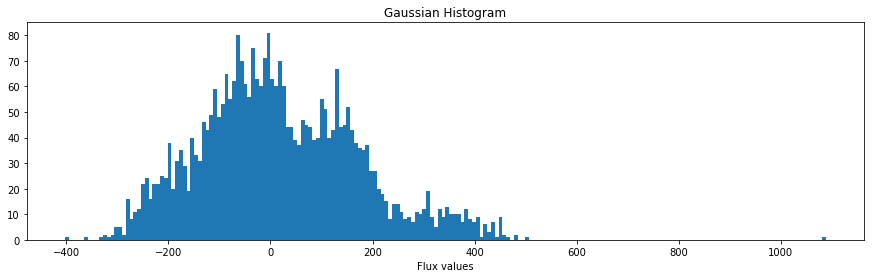

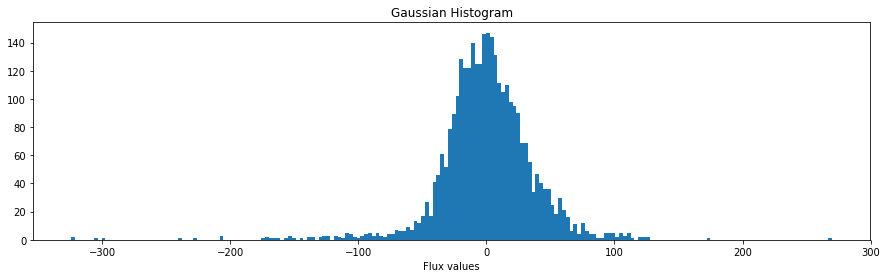

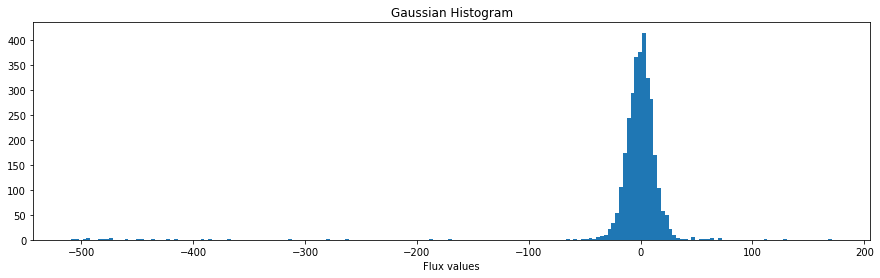

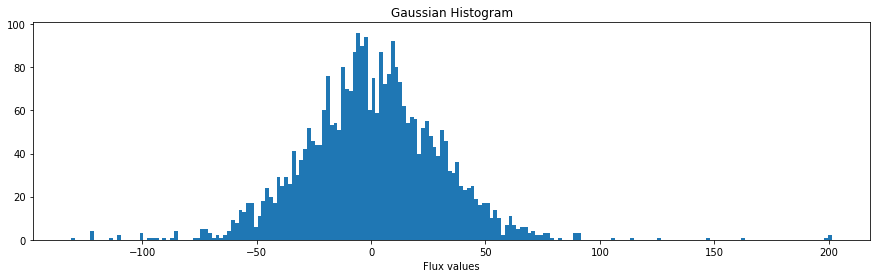

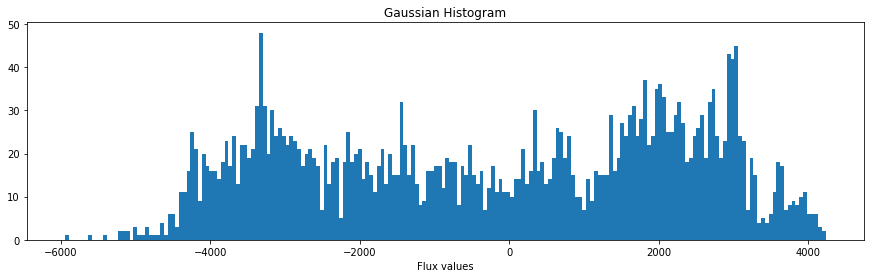

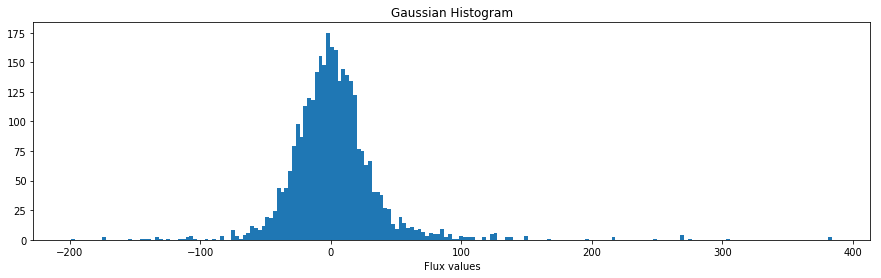

In [48]:
#Fitting a Gaussian (normal distribution) curve to a histogram of 7 Exoplanet

labels_2=[1,5,8,12,16,21,25]
for i in labels_2:
    plt.hist(train.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.show()

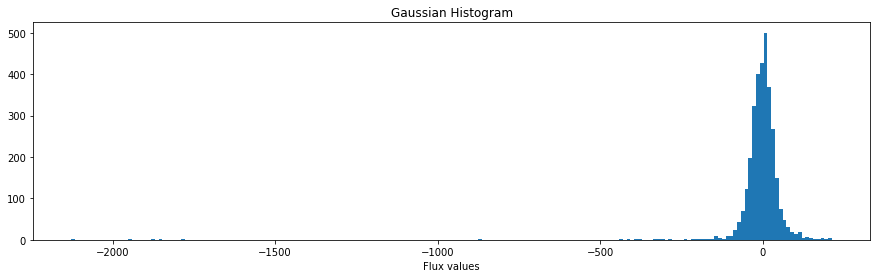

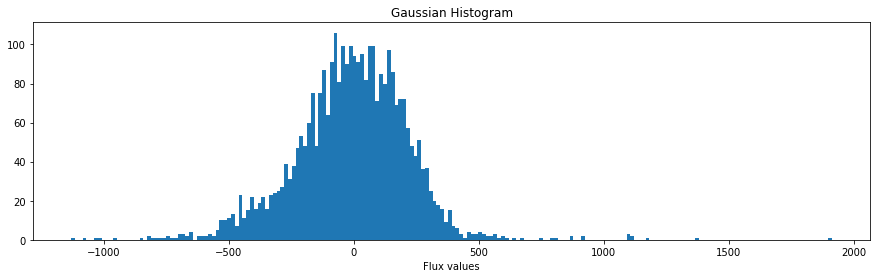

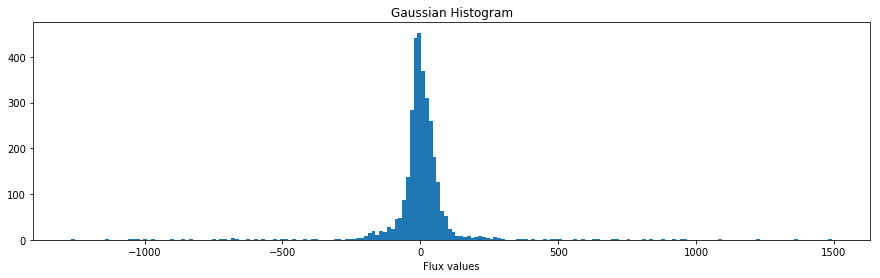

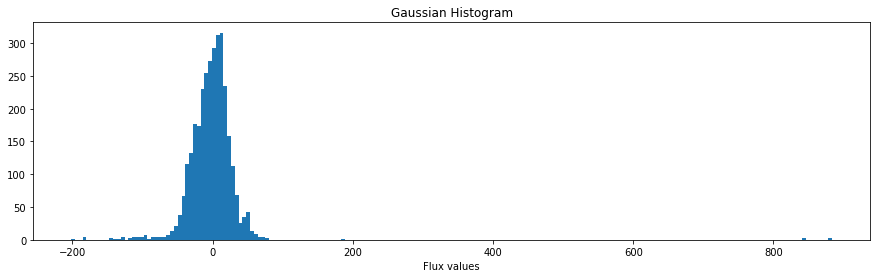

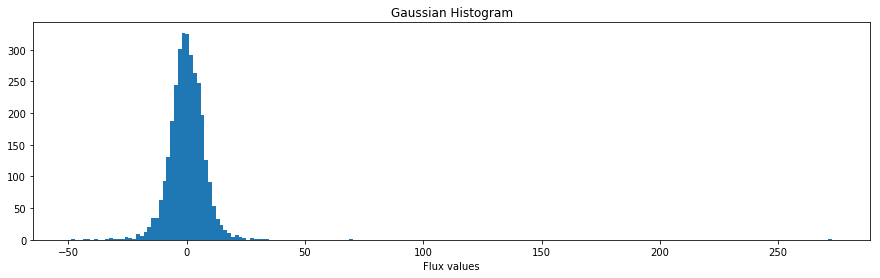

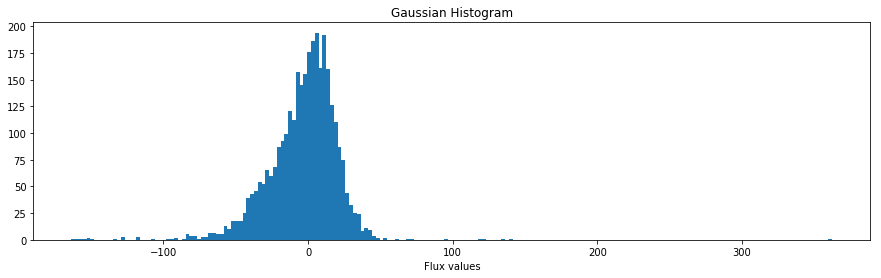

In [49]:
labels_1=[100,200,300,450,640,632]
for i in labels_1:
    plt.hist(train.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.show()


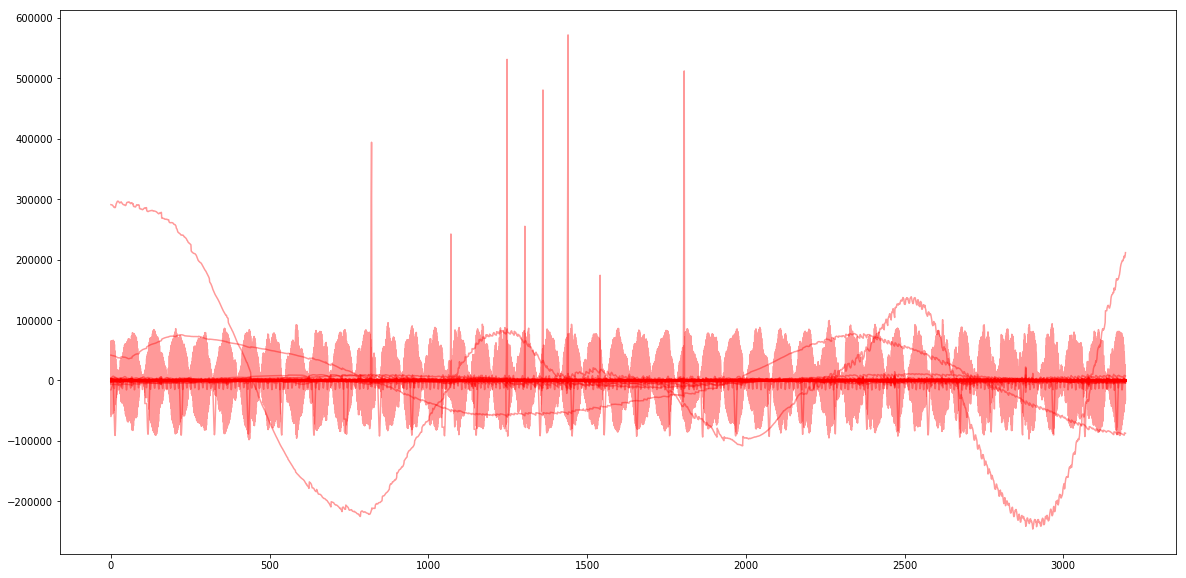

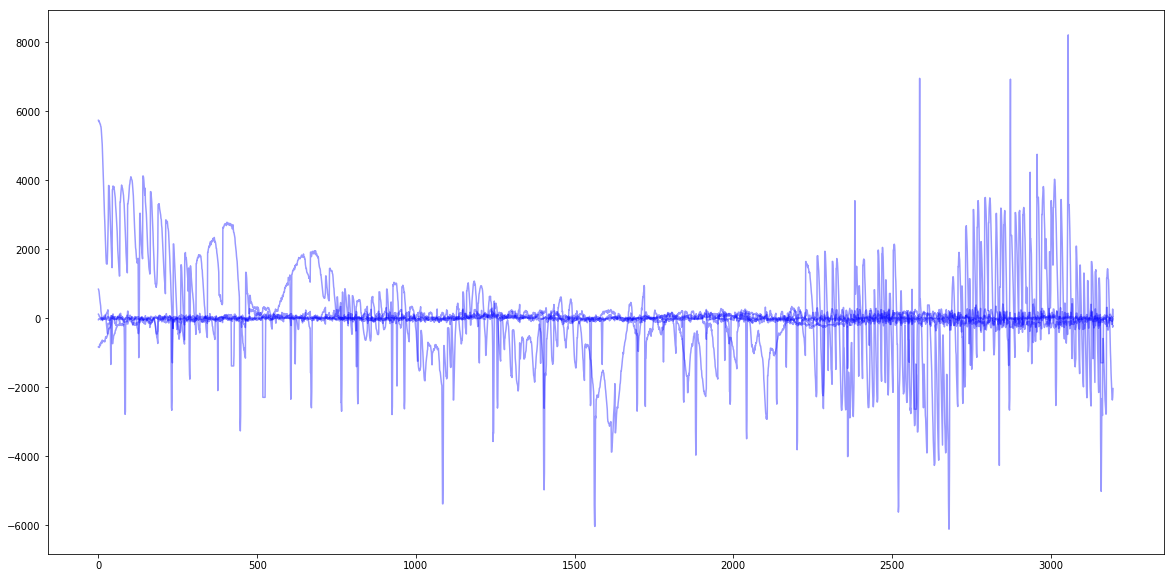

In [ ]:

colors = {'1.0':'red', '2.0':'blue'}
plt.figure(figsize=(20,10))
for x in range(test.shape[0]):
    if(test.values[x,0]==1):
        plt.plot(test.values[x,1:],color=colors[str(test.values[x,0])],alpha=0.4)  
plt.show()

plt.figure(figsize=(20,10))
for x in range(test.shape[0]):
    if(test.values[x,0]==2):
        plt.plot(test.values[x,1:],color=colors[str(test.values[x,0])],alpha=0.4)  
plt.show()

<img src="files/nasa.jpg">

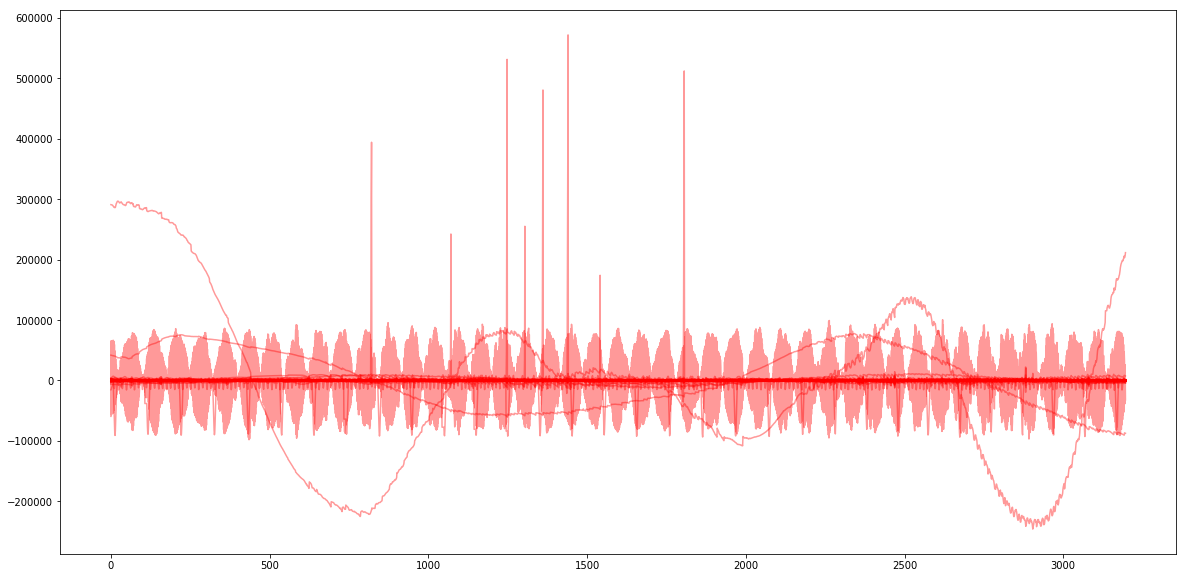

In [ ]:
colors = {'1.0':'red', '2.0':'blue'}
plt.figure(figsize=(20,10))
for x in range(test.shape[0]):
    if(train.values[x,0]==1):
        plt.plot(test.values[x,1:],color=colors[str(test.values[x,0])],alpha=0.4)  
plt.show()

plt.figure(figsize=(20,10))
for x in range(test.shape[0]):
    if(train.values[x,0]==2):
        plt.plot(test.values[x,1:],color=colors[str(test.values[x,0])],alpha=0.4)  
plt.show()

In [71]:
from pandas.core import datetools
import statsmodels.api as sm
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [72]:
def generate_dataset(num_samples=100, noise=100):
    '''Generates a random number of samples to act as a dataset for linear regression.'''
    x = []
    y = []
    for i in range(num_samples):
        x.append(i)
        if noise == 0:
            added_noise  = 0
        else:
            upper_noise_limit = noise / 2
            lower_noise_limit = (upper_noise_limit) * -1
            added_noise = np.random.rand() *  np.random.randint(lower_noise_limit, upper_noise_limit)
        y.append(i + added_noise)
    return x, y



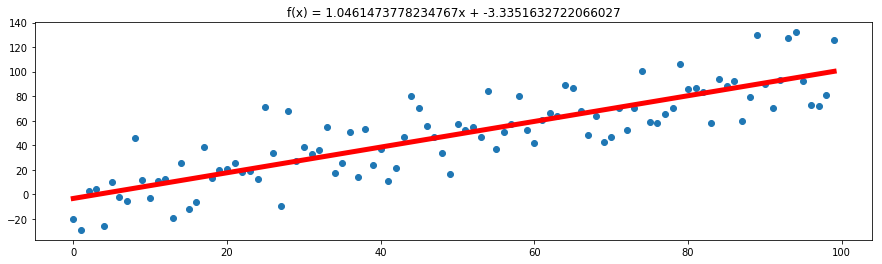

In [73]:
def show_best_fit(x, y):
    '''Plots a line of best fit on top of the data points'''
    plt.scatter(x, y)
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red', linewidth=5)
    m, b  = np.polyfit(x, y, 1)
    plt.title("f(x) = {}x + {}".format(m, b))
    
x, y = generate_dataset()
show_best_fit(x, y)

In [74]:
train = train.rename(index=str, columns={"FLUX.1":"FLUX_1"})

In [75]:
X = train
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
#Fit the scaler to train.data
scaler.fit(X)
# call scaler.transform() on train.data and store the result in scaled_X
scaled_X = scaler.transform(X)

# Store the labels contained in train.targets below
# X['FLUX_1'].astype(int)
labels = train.FLUX_1

# Create a PCA() object
pca = PCA()

#Fit the pca object to scaled_X
pca.fit(scaled_X)

# Call pca.transform() on scaled_X and store the results below
X_with_pca = pca.transform(scaled_X)

variance = pca.explained_variance_ratio_
# Enumerate through pca.explained_variance_ratio_ to see the amount of variance captured by each Principal Component
for ind, var in enumerate(variance):
    print("Explained Variance for Principal Component {}: {}".format(ind, var))

Explained Variance for Principal Component 0: 0.2736497917356645
Explained Variance for Principal Component 1: 0.22529171651130592
Explained Variance for Principal Component 2: 0.14924459018512468
Explained Variance for Principal Component 3: 0.09799630455468258
Explained Variance for Principal Component 4: 0.05818153659751534
Explained Variance for Principal Component 5: 0.04071582040124677
Explained Variance for Principal Component 6: 0.03314312371327224
Explained Variance for Principal Component 7: 0.02871367780044523
Explained Variance for Principal Component 8: 0.020946092664942864
Explained Variance for Principal Component 9: 0.018392498550608507
Explained Variance for Principal Component 10: 0.011480018034006775
Explained Variance for Principal Component 11: 0.008121769141568194
Explained Variance for Principal Component 12: 0.0071941986337113375
Explained Variance for Principal Component 13: 0.006423346115140993
Explained Variance for Principal Component 14: 0.00320512661272162

Explained Variance for Principal Component 702: 4.391097645026419e-09
Explained Variance for Principal Component 703: 4.367092746731538e-09
Explained Variance for Principal Component 704: 4.3490239318740135e-09
Explained Variance for Principal Component 705: 4.325601182968278e-09
Explained Variance for Principal Component 706: 4.312910662225956e-09
Explained Variance for Principal Component 707: 4.3046857058762044e-09
Explained Variance for Principal Component 708: 4.299849202953941e-09
Explained Variance for Principal Component 709: 4.281125625964973e-09
Explained Variance for Principal Component 710: 4.265877758634374e-09
Explained Variance for Principal Component 711: 4.248410051183346e-09
Explained Variance for Principal Component 712: 4.2368947487734075e-09
Explained Variance for Principal Component 713: 4.217936415872546e-09
Explained Variance for Principal Component 714: 4.199421317539819e-09
Explained Variance for Principal Component 715: 4.173694260820167e-09
Explained Varianc

Explained Variance for Principal Component 2171: 1.3919160943335938e-10
Explained Variance for Principal Component 2172: 1.388394484845805e-10
Explained Variance for Principal Component 2173: 1.384618905346824e-10
Explained Variance for Principal Component 2174: 1.3817515163185308e-10
Explained Variance for Principal Component 2175: 1.3793792104120042e-10
Explained Variance for Principal Component 2176: 1.3764837844099376e-10
Explained Variance for Principal Component 2177: 1.3743904854521295e-10
Explained Variance for Principal Component 2178: 1.3685702767104518e-10
Explained Variance for Principal Component 2179: 1.3641521664071072e-10
Explained Variance for Principal Component 2180: 1.3635608602366857e-10
Explained Variance for Principal Component 2181: 1.3632340946905263e-10
Explained Variance for Principal Component 2182: 1.3616679281173032e-10
Explained Variance for Principal Component 2183: 1.3537033995584345e-10
Explained Variance for Principal Component 2184: 1.351566906950364

In [76]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree
# from sklearn import preprocessing
# from sklearn import utils

# pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(X_with_pca, labels)
# reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(scaled_X, labels)

# clf = DecisionTreeClassifier()
# clf_for_pca = DecisionTreeClassifier()

# lab_enc = preprocessing.LabelEncoder()

# # Fit both models on the appropriate datasets
# clf.fit(reg_X_train, reg_y_train)
# clf_for_pca.fit(pca_X_train, pca_y_train)

# # Use each fitted model to make predictions on the appropriate test sets
# reg_pred = clf.predict(reg_X_test)
# pca_pred = clf_for_pca.predict(pca_X_test)






# print("Accuracy for regular model: {}".format(accuracy_score(reg_y_test, reg_pred)))
# print("Accuracy for model with PCA: {}".format(accuracy_score(pca_y_test, pca_pred)))

In [77]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
# Fit the k_means object to the scaled data, and store the results it returns below
output = k_means.fit(scaled_X)

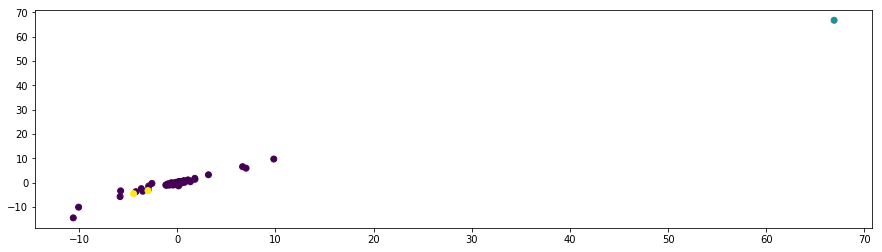

In [78]:
plt.figure('3 Cluster K-Means')
plt.scatter(scaled_X[:, 1], scaled_X[:, 2], c=output.labels_)



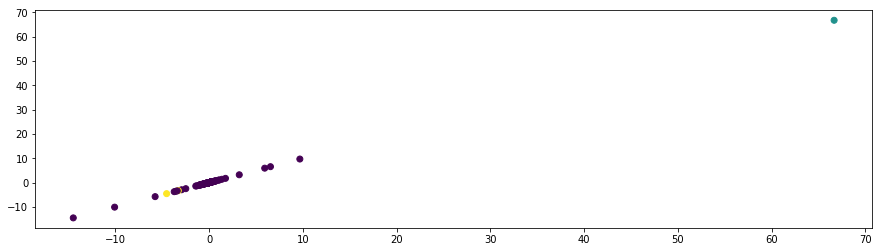

In [79]:
plt.figure('3 Cluster K-Means')
plt.scatter(scaled_X[:, 2], scaled_X[:, 2], c=output.labels_)




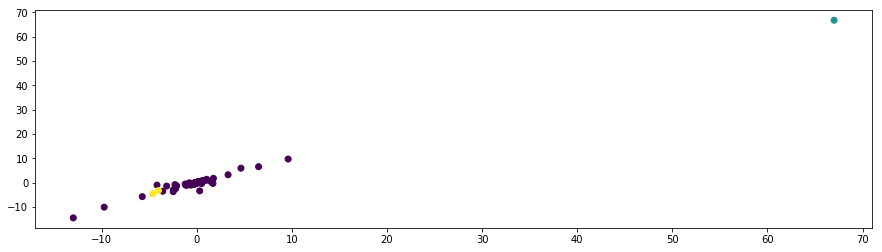

In [80]:
plt.figure('3 Cluster K-Means')
plt.scatter(scaled_X[:, 3], scaled_X[:, 2], c=output.labels_)




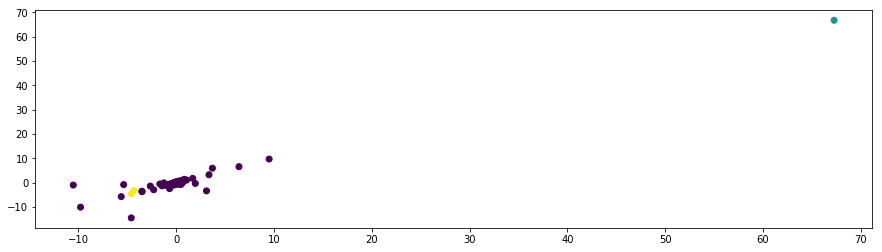

In [81]:
plt.figure('3 Cluster K-Means')
plt.scatter(scaled_X[:, 4], scaled_X[:, 2], c=output.labels_)

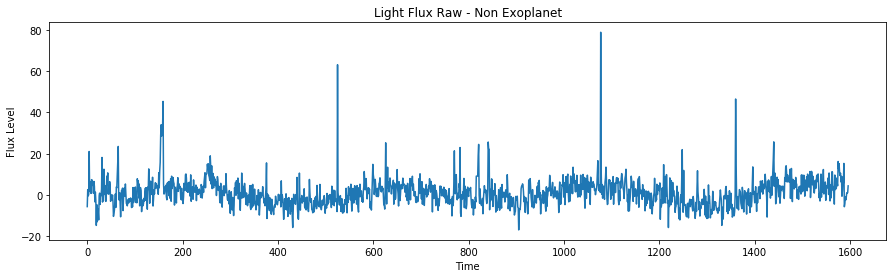

In [82]:
index_row = 150
flux_non_exo = X.iloc[index_row,1:(X_train.shape[1]//2)].values

plt.plot(flux_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()

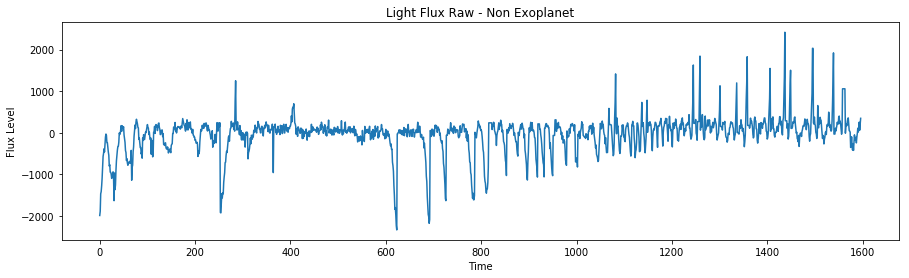

In [83]:
index_row = 150
flux_non_exo = test.iloc[index_row,1:(X_train.shape[1]//2)].values
plt.plot(flux_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()

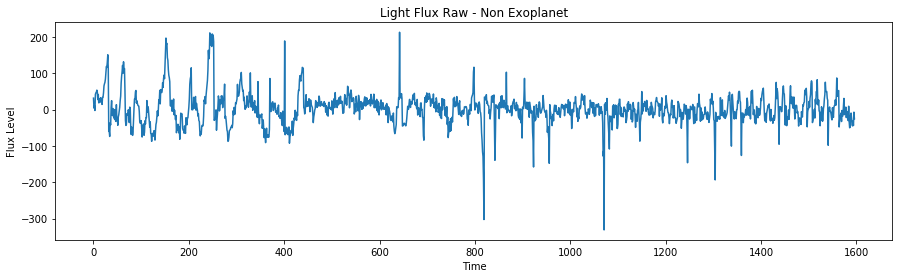

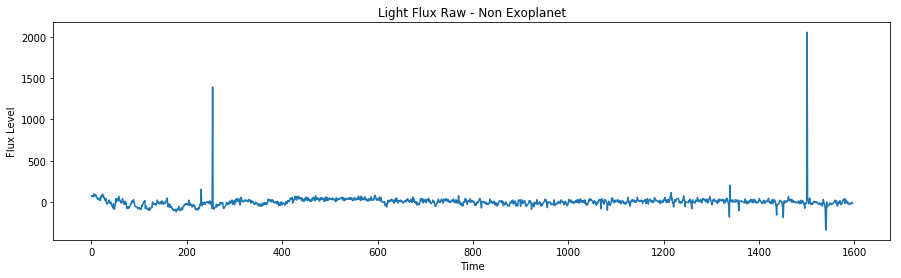

In [84]:
index_row = 100
flux_non_exo = train.iloc[index_row,1:(X_train.shape[1]//2)].values

plt.plot(flux_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()


flux_non_exo = test.iloc[index_row,1:(X_train.shape[1]//2)].values

plt.plot(flux_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()

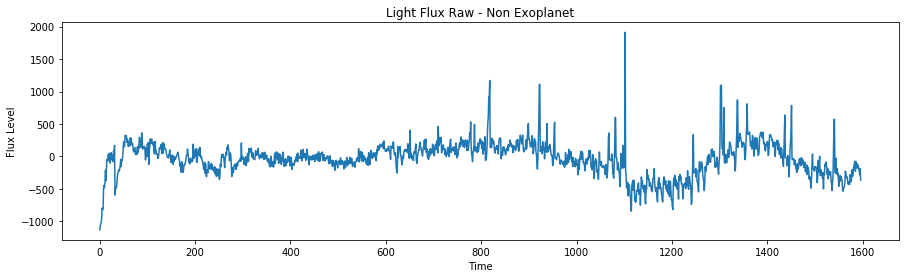

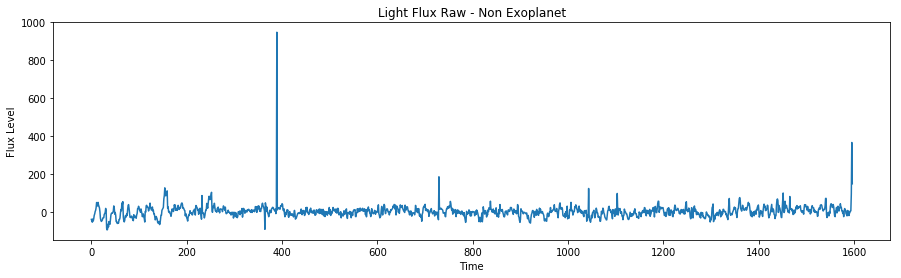

In [85]:
index_row = 200
flux_non_exo = train.iloc[index_row,1:(X_train.shape[1]//2)].values

plt.plot(flux_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()


flux_non_exo = test.iloc[index_row,1:(X_train.shape[1]//2)].values

plt.plot(flux_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()

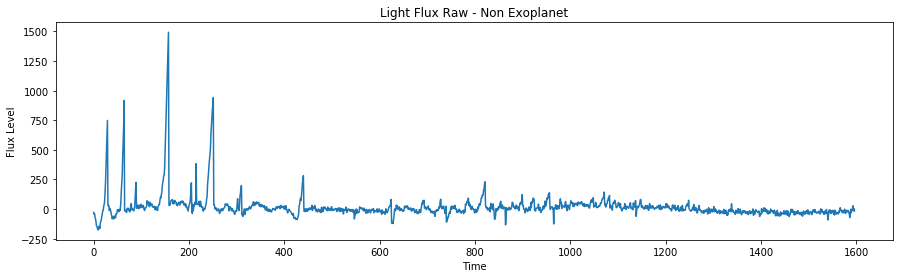

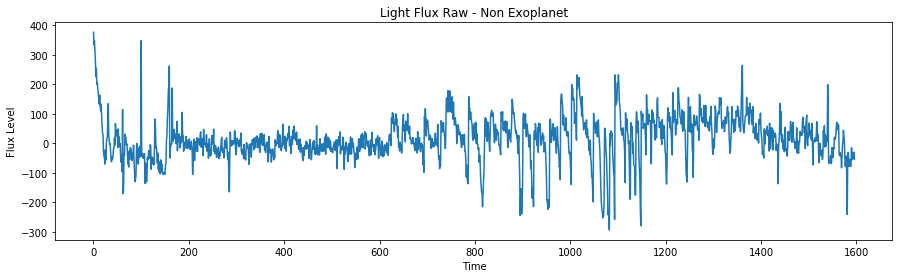

In [86]:
index_row = 300
flux_non_exo = train.iloc[index_row,1:(X_train.shape[1]//2)].values

plt.plot(flux_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()


flux_non_exo = test.iloc[index_row,1:(X_train.shape[1]//2)].values

plt.plot(flux_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()

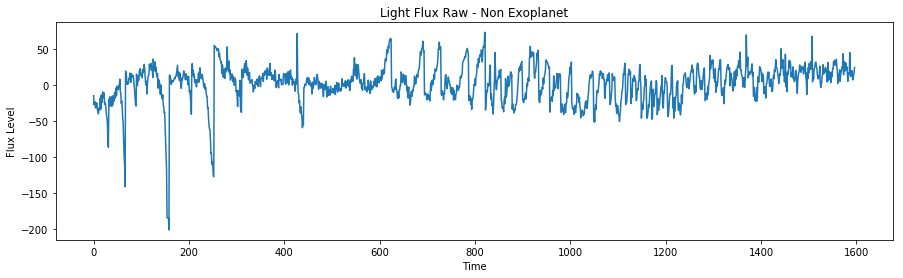

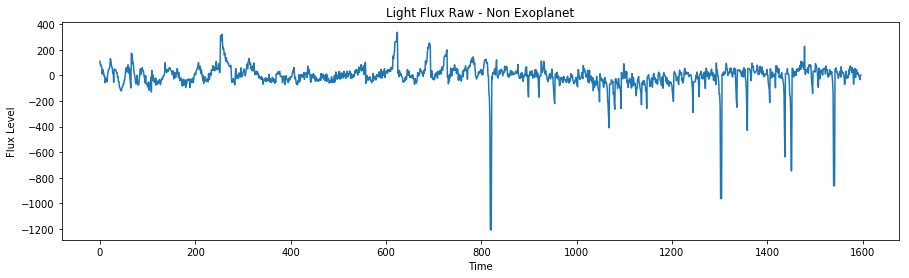

In [87]:
index_row = 450
flux_non_exo = train.iloc[index_row,1:(X_train.shape[1]//2)].values

plt.plot(flux_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()


flux_non_exo = test.iloc[index_row,1:(X_train.shape[1]//2)].values

plt.plot(flux_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()

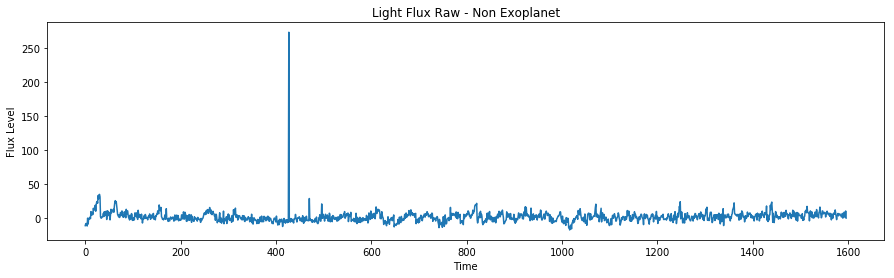

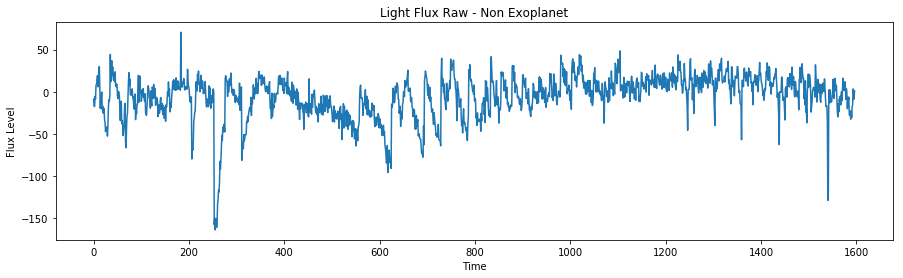

In [88]:
index_row = 640
flux_non_exo = train.iloc[index_row,1:(X_train.shape[1]//2)].values

plt.plot(flux_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()

index_row = 632
flux_non_exo = train.iloc[index_row,1:(X_train.shape[1]//2)].values

plt.plot(flux_non_exo)
plt.ylabel('Flux Level')
plt.xlabel('Time')
plt.title("Light Flux Raw - Non Exoplanet")
plt.show()

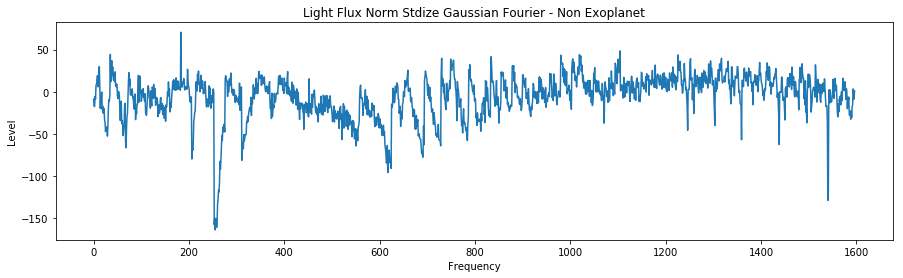

In [90]:
plt.plot(flux_non_exo)
plt.ylabel('Level')
plt.xlabel('Frequency')
plt.title("Light Flux Norm Stdize Gaussian Fourier - Non Exoplanet")
plt.show()

In [ ]:
# import seaborn as sns
# sns.pairplot(data=X, hue='FLUX_1')
# plt.show()